<a href="https://colab.research.google.com/github/Juanjojhon2005/Bases-de-Datos-2/blob/main/Copia_de_Gradiente_Descendente_RLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

A continuación, cargamos nuestro conjunto de datos. Supongamos que tenemos un archivo CSV llamado "datos.csv" que contiene $p$ variables predictoras ($X_1$, $X_2$, ..., $X_p$) y una variable de resultado ($Y$):

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [ ]:
data = pd.read_csv('CarPrice_Assignment.csv', sep = ",")
data.head(20)
#data.info()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#Remover variables cualitativas
data_num = data.select_dtypes(include=[np.float64,np.int64])
data_num.head(10)
# Dejar variables cualitativas
#df_num = df.select_dtypes(exclude=[np.number])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
#Remover id
data_num = data_num.drop('car_ID', axis=1)

#Verificación
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.2 KB


# Identificar las variables significativas en el modelo

In [ ]:
#Ajuste del modelo con statsmodels
import statsmodels.formula.api as smf

In [ ]:
# Ajuste de un primer modelo con las variable predictoras
modelo = smf.ols(formula = 'price ~ symboling+wheelbase+carlength+carwidth+carheight+curbweight +enginesize  +boreratio+stroke +  compressionratio + horsepower + peakrpm + citympg +highwaympg', data = data_num).fit()

# Resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     78.05
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           7.97e-71
Time:                        21:19:51   Log-Likelihood:                -1936.7
No. Observations:                 205   AIC:                             3903.
Df Residuals:                     190   BIC:                             3953.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.165e+04   1.57e+04  

In [ ]:
# Ajuste de un primer modelo con las variable predictoras
data_num_var_sig = data_num[['price', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm']]
data_num_var_sig.head()

,price,enginesize,stroke,compressionratio,horsepower,peakrpm
0,13495.0,130,2.68,9.0,111,5000
1,16500.0,130,2.68,9.0,111,5000
2,16500.0,152,3.47,9.0,154,5000
3,13950.0,109,3.40,10.0,102,5500
4,17450.0,136,3.40,8.0,115,5500


In [ ]:
# Ajuste de un primer modelo con las variable predictoras
modelo2 = smf.ols(formula = 'price ~ enginesize  + stroke +  compressionratio + horsepower + peakrpm ', data = data_num_var_sig).fit()

# Resumen del modelo
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     187.0
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           3.59e-73
Time:                        21:21:47   Log-Likelihood:                -1954.1
No. Observations:                 205   AIC:                             3920.
Df Residuals:                     199   BIC:                             3940.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.444e+04   4311.096  

Luego, normalizamos las variables predictoras para que todas tengan una media de cero y una desviación estándar de uno. Esto puede ayudar a mejorar la convergencia del algoritmo de gradiente descendiente:

In [ ]:
data_norm = (data_num_var_sig - data_num_var_sig.mean()) / data_num_var_sig.std()
data_norm

,price,enginesize,stroke,compressionratio,horsepower,peakrpm
0,0.027324,0.074267,-1.834886,-0.287645,0.174057,-0.262318
1,0.403473,0.074267,-1.834886,-0.287645,0.174057,-0.262318
2,0.403473,0.602571,0.684271,-0.287645,1.261448,-0.262318
3,0.084279,-0.430023,0.461055,-0.035885,-0.053537,0.785932
4,0.522389,0.218350,0.461055,-0.539405,0.275209,0.785932
...,...,...,...,...,...,...
200,0.446659,0.338419,-0.336147,-0.161765,0.249921,0.576282
201,0.722042,0.338419,-0.336147,-0.363173,1.413178,0.366632
202,1.027468,1.106861,-1.229012,-0.337997,0.755685,0.785932
203,1.150765,0.434474,0.461055,3.236992,0.047616,-0.681618


In [ ]:
#Importar métodos para regresión lineal de la libreria sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Definir el dataframe de variable predictoras y variable respuesta
X = data_norm[['enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm']]
Y = data_norm['price']

Ahora, dividimos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. Utilizaremos el 80% de los datos para entrenamiento y el 20% restante para prueba:

In [ ]:
#Definir datos de entrenamiento y datos de prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
#Ajuste del modelo con datos de prueba
linear_model = LinearRegression().fit(x_train, y_train)

In [ ]:
print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))

Puntaje Entrenamiento:  0.8209616225399026


In [ ]:
#Estimación de paramétros
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

stroke             -0.104377
peakrpm             0.117030
compressionratio    0.199552
horsepower          0.283241
enginesize          0.691852
dtype: float64


In [ ]:
#Predicción usando datos de prueba
y_pred = linear_model.predict(x_test)
y_pred

array([ 2.02443714,  0.21243384, -0.29589213, -0.3661413 ,  0.36786196,
       -0.02723741,  0.58336346,  0.80049708,  0.37576066,  1.21140152,
       -0.33850248,  0.21772145, -0.77315901, -0.77315901, -0.93014428,
       -0.65187308, -0.76523617, -0.75534242, -0.76523617, -0.94675464,
        0.38879114, -0.77667697, -0.36466379, -0.39126087,  0.21243384,
        0.64558456,  0.23832471, -0.79512062, -0.93014428,  1.85036442,
       -0.41406263,  0.41203632, -0.76523617, -0.76189263,  2.78946874,
        0.16815757,  0.58336346, -0.89465202, -0.41406263, -0.77315901,
       -0.56236245])

In [ ]:
#Importar métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8337314623067433


In [ ]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print(MAPE)

2.075843876832374


In [ ]:
ECM = mean_squared_error(y_test, y_pred)
print(ECM)

0.13448912536561394


In [ ]:
EAM = mean_absolute_error(y_test, y_pred)
print(EAM)

0.2857308127875122


In [ ]:
#Importar métricas
from sklearn.metrics import mean_squared_error
ecm = mean_squared_error(y_test, y_pred) #Error Cuadrático Medio
print(ecm)

0.13448912536561394


In [ ]:
#Raíz del Error Cuadrático Medio (RECM)
import math
recm = math.sqrt(ecm)
print(recm)

0.3667275901341675


In [ ]:
#Error Absoluto Medio
eam = mean_absolute_error(y_test, y_pred)
print(eam)

0.2857308127875122


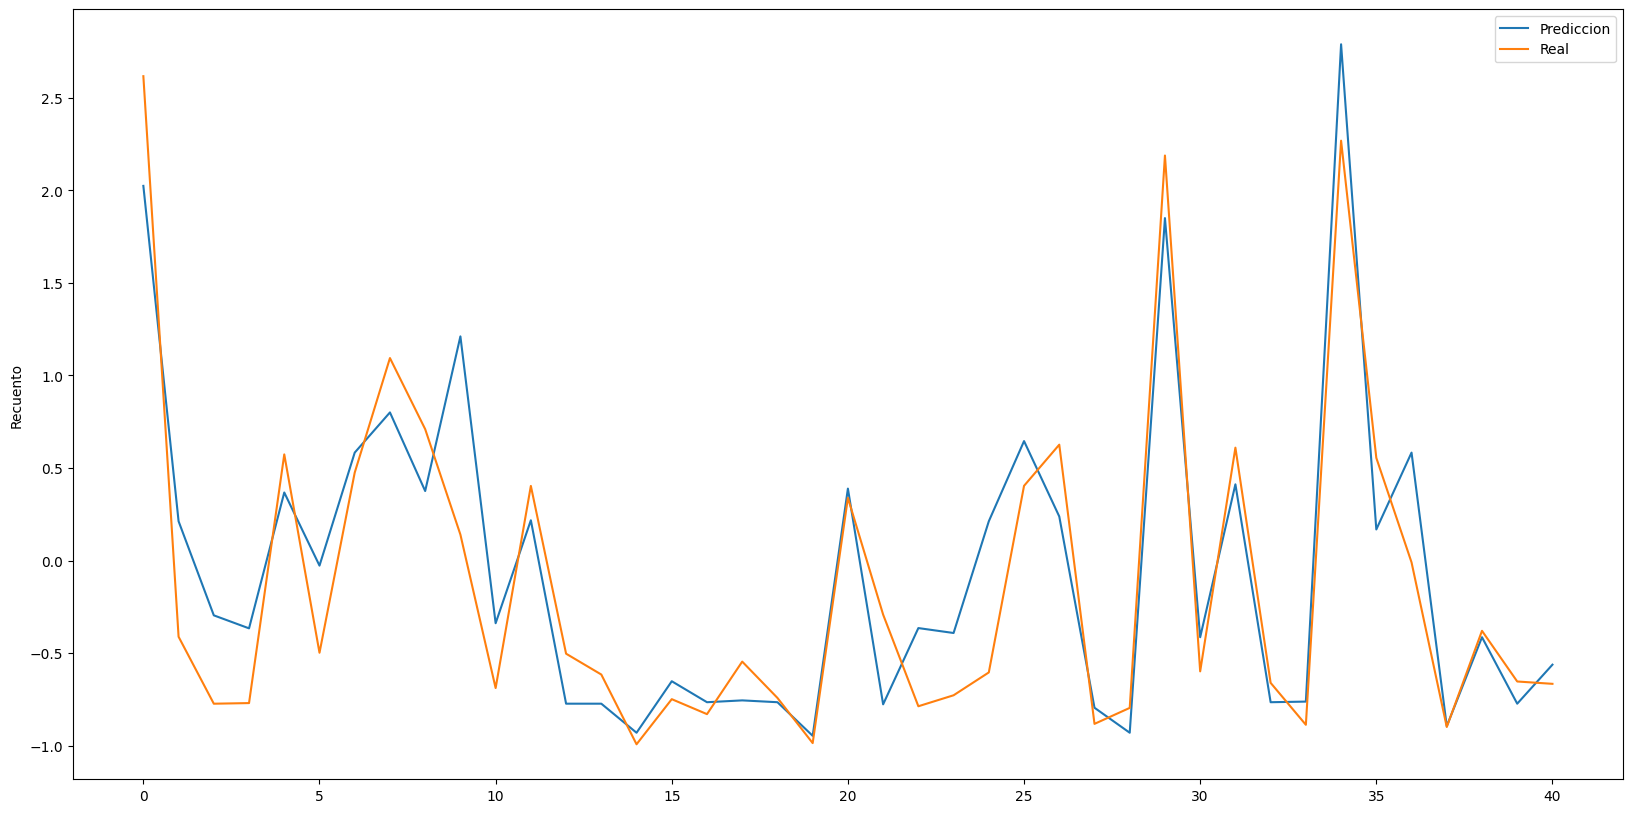

In [ ]:
#Grafico de predicción
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')
plt.ylabel('Recuento')
plt.legend()

# Gradiente descendente

Ahora, definimos las funciones necesarias para el algoritmo de gradiente descendiente estocástico. Primero, definimos la función para calcular la predicción de nuestro modelo:

In [ ]:
def predict(X, weights):
    return np.dot(X, weights)

A continuación, definimos la función para calcular el error cuadrático medio (MSE) de nuestro modelo:

In [ ]:
def mse_loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

Luego, definimos la función para actualizar los pesos de nuestro modelo utilizando el algoritmo de gradiente descendiente estocástico:

python


In [ ]:
def stochastic_gradient_descent(X, y, n_epochs, learning_rate, batch_size):
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    for epoch in range(n_epochs):
        batch_indices = np.random.choice(X.shape[0], batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        y_pred = predict(X_batch, weights)
        gradient = 2 * np.dot(X_batch.T, y_pred - y_batch) / batch_size
        weights -= learning_rate * gradient
    return weights

In [ ]:
print(type(x_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
x_train, x_test, y_train, y_test

(     enginesize    stroke  compressionratio  horsepower   peakrpm
 173   -0.117843  0.907487         -0.363173   -0.306419 -1.939517
 193   -0.430023  0.461055         -0.287645   -0.407571  0.785932
 28    -0.117843  0.652383         -0.413525   -0.407571 -0.262318
 94    -0.718189  0.110286         -0.186941   -0.888047  0.156982
 33    -0.838258  0.492943         -0.237293   -0.711030  1.834181
 ..          ...       ...               ...         ...       ...
 2      0.602571  0.684271         -0.287645    1.261448 -0.262318
 26    -0.886286 -0.081042         -0.186941   -0.913335  0.785932
 197    0.338419 -0.336147         -0.161765    0.249921  0.576282
 29     0.698626  2.055458         -0.791164    1.033855 -0.262318
 176   -0.117843  0.907487         -0.363173   -0.306419 -1.939517
 
 [164 rows x 5 columns],
      enginesize    stroke  compressionratio  horsepower   peakrpm
 71     2.571704 -0.495587         -0.463877    1.286737 -0.786443
 169    0.458488  0.779935         

In [ ]:
y_train = y_train.values
x_train = x_train.values

In [ ]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>



Finalmente, utilizamos la función de gradiente descendiente estocástico para entrenar nuestro modelo y calcular los pesos óptimos:

In [ ]:
n_epochs = 1000
learning_rate = 0.01
batch_size = 1
weights = stochastic_gradient_descent(x_train, y_train, n_epochs, learning_rate, batch_size)

In [ ]:
#Grafico de predicción usando el modelo con variables significativas
#plt.figure(figsize = (20,10))

#plt.plot(y_pred, label='Prediccion')
#plt.plot(y_test, label='Real')
#plt.ylabel('Precio')
#plt.title('Comportamiento del precio observado y estimado')
#plt.legend()

Podemos utilizar los pesos óptimos para hacer predicciones en el conjunto de prueba:



In [ ]:
X_test = x_test.values
y_test = y_test.values
y_pred = predict(x_test, weights)
mse = mse_loss(y_test, y_pred)
print('MSE en el conjunto de prueba:', mse)

MSE en el conjunto de prueba: 0.13104495583020082


In [ ]:
print(y_test)
print('---------')
print(y_pred)

[ 2.61705794 -0.41153728 -0.77329137 -0.76991166  0.57360635 -0.49803281
  0.4754487   1.09418588  0.71015074  0.14048193 -0.68867346  0.4034734
 -0.50303979 -0.61569677 -0.99247179 -0.74875718 -0.82961986 -0.54578685
 -0.74199776 -0.98608789  0.33900857 -0.29187053 -0.78706056 -0.72772788
 -0.6043059   0.40384893  0.62628388 -0.88219312 -0.79594794  2.18846071
 -0.59854787  0.6100112  -0.66063439 -0.8872001   2.26863493  0.55493446
 -0.0096022  -0.89896649 -0.37949263 -0.6532491  -0.66589171]
---------
[ 2.15140993  0.23830433 -0.44250229 -0.38759752  0.39401467 -0.10628572
  0.52407762  0.81519802  0.41088988  1.27000791 -0.50124393  0.22376174
 -0.80323348 -0.80323348 -0.96838378 -0.72737402 -0.813681   -0.8180395
 -0.813681   -1.03054219  0.38742819 -0.86361816 -0.36960083 -0.40824911
  0.23830433  0.69312173  0.26532039 -0.86016407 -0.96838378  1.94649059
 -0.41460385  0.41166868 -0.813681   -0.82521048  2.89024393  0.166544
  0.52407762 -0.9382936  -0.41460385 -0.80323348 -0.5917

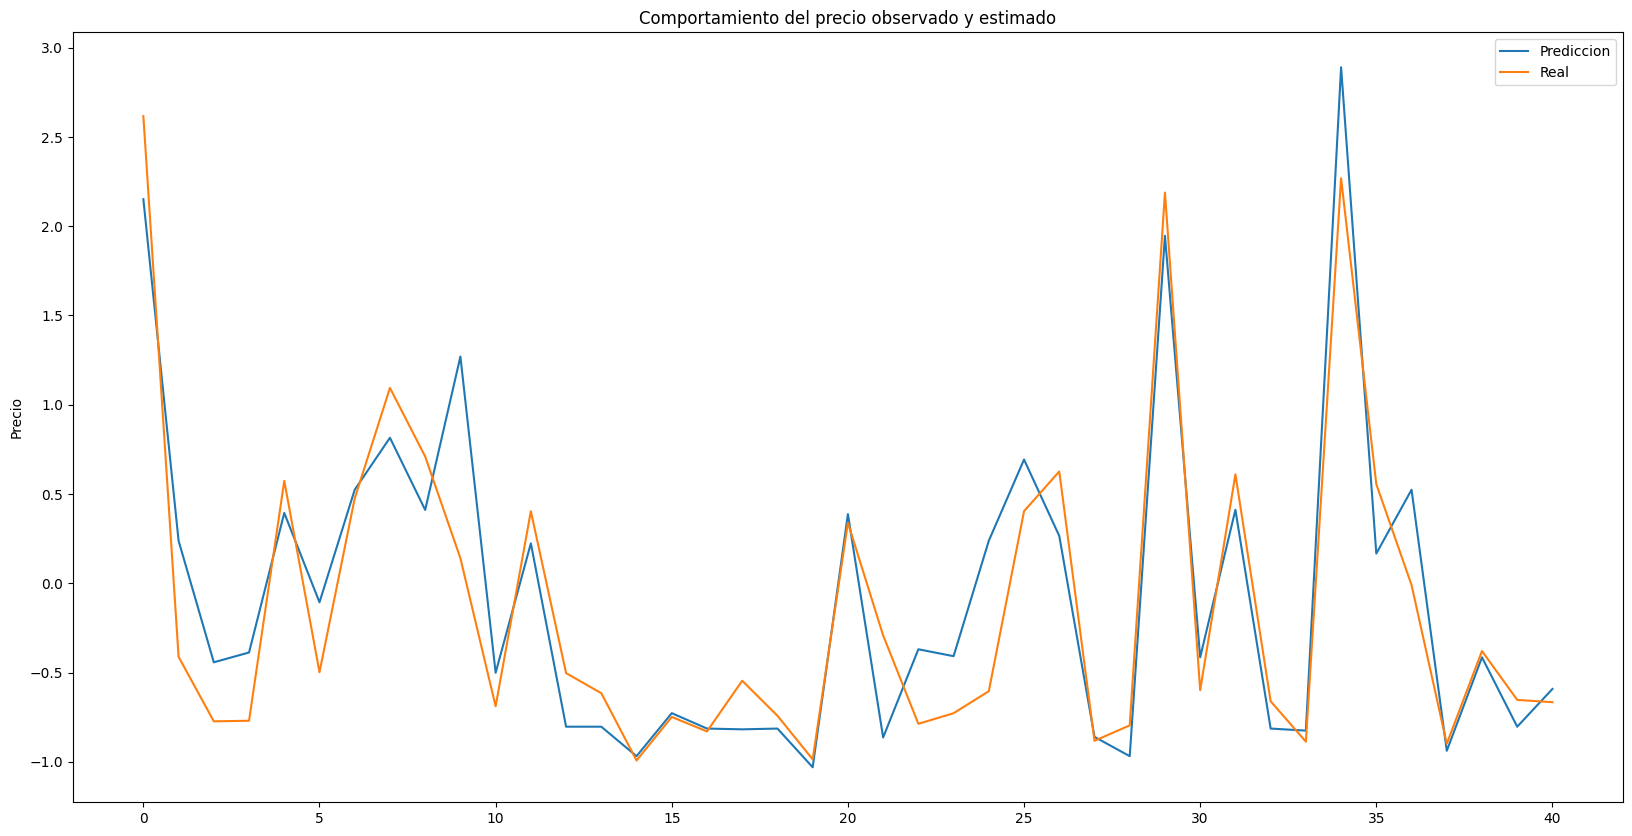

In [ ]:
#Grafico de predicción
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test, label='Real')
plt.ylabel('Precio')
plt.title('Comportamiento del precio observado y estimado')
plt.legend()

# Modelo con variables significativas

In [ ]:
#Correr esta linea una vez
data_num = data[['enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price']]
data_num.head()


,enginesize,stroke,compressionratio,horsepower,peakrpm,price
0,130,2.68,9.0,111,5000,13495.0
1,130,2.68,9.0,111,5000,16500.0
2,152,3.47,9.0,154,5000,16500.0
3,109,3.40,10.0,102,5500,13950.0
4,136,3.40,8.0,115,5500,17450.0


# Ajuste del modelo con las variables significativas

In [ ]:
#Normalizar los datos
data_norm = (data_num - data_num.mean()) / data_num.std()


In [ ]:
#Separar datos de entrenamiento y datos de prueba
train_data = data_norm.sample(frac=0.8, random_state=42)
test_data = data_norm.drop(train_data.index)

In [ ]:
train_data.head()

,enginesize,stroke,compressionratio,horsepower,peakrpm,price
15,1.971359,0.429167,-0.539405,1.969517,0.576282,2.188461
9,0.098281,0.461055,-0.791164,1.413178,0.785932,0.573606
100,-0.165871,0.684271,-0.413525,-0.179978,0.156982,-0.466614
132,-0.141857,-0.591251,-0.209599,0.148769,0.261807,-0.178588
68,1.346999,1.226368,2.859352,0.477515,-1.625043,1.874023


In [ ]:
#Definir variables predictoras y variable independiente
X_train = train_data.drop('price', axis=1).values
y_train = train_data['price'].values

In [ ]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Inicializar valores
n_epochs = 1000
learning_rate = 0.01
batch_size = 32
weights = stochastic_gradient_descent(X_train, y_train, n_epochs, learning_rate, batch_size)

In [ ]:
#Calcular Error Cuadrático Medio
X_test = test_data.drop('price', axis=1).values
y_test = test_data['price'].values
y_pred = predict(X_test, weights)
mse = mse_loss(y_test, y_pred)
print('MSE en el conjunto de prueba:', mse)

MSE en el conjunto de prueba: 0.24514921140535237


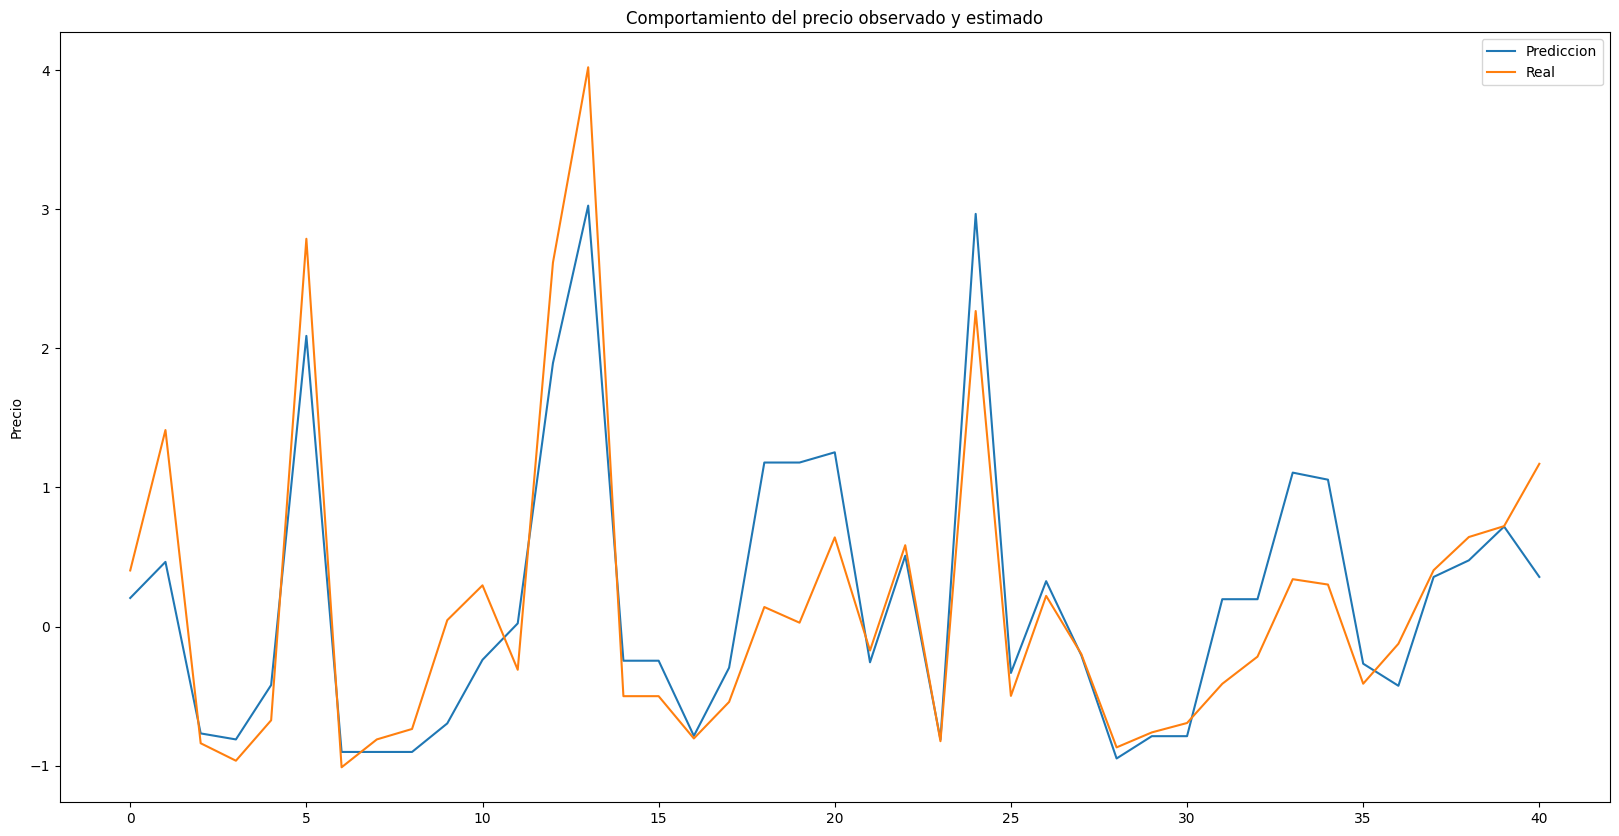

In [ ]:
#Grafico de predicción usando el modelo con variables significativas
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test, label='Real')
plt.ylabel('Precio')
plt.title('Comportamiento del precio observado y estimado')
plt.legend()

Observaciones:


*   El modelo 1 tiene un MSE=0.23 mientras que el modelo 2 tiene un MSE=0.24
*   El modelo 2 tiene menos paramétros que el modelo 1 con una perdida de MSE despreciable.





Hacer gradiente descendente con las metricas, replicar esa parte aca abajo y comparar con el modelo reducido de las 5 variables